## Import Library

In [24]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter import *
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#import library

from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

# Sastrawi
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to C:\Users\THINKPAD
[nltk_data]     E470\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Preprocessing Function

def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()    
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = sentence.split()
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum()]
    
    #remove stopwords
    words = [x for x in words if x not in stop_words]

    #stemming using Sastrawi
    #words = [stemmer.stem(x) for x in words]

    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [5]:
# Library for features extractions and modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

## Import Clean Dataset

In [6]:
# import clean dataset after text pre-processing
df = pd.read_csv('dfresik.csv')

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,review,sentiment
0,bermanfaat,1
1,mendownload apk jkn mobile mengikuti tuntunan ...,0
2,blm pake,0
3,ok,1
4,masuk gagal daftar mengisi no hp mencoba hubun...,0


In [9]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [10]:
df = df.dropna(how='any')

In [11]:
df['sentiment'].value_counts()

1    62026
0    46707
Name: sentiment, dtype: int64

In [12]:
# spliting data to train dataset and test dataset
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25,
                                                    stratify=y,
                                                    random_state=42)

In [13]:
X_train.head()

96785                                                 good
15733    simpel mudah dak repot2 k kantor bpjsdan hemat...
61259        teransaksi belom selesai sayatidak lihat menu
12300    terdaftar jkn mobiletp pas log in ktanya blm t...
75153                                              membatu
Name: review, dtype: object

## Vectorizing

In [15]:
# Feature extractions using TF-IDF

tfidf = TfidfVectorizer(lowercase=True, stop_words = stop_words)
tfidf

TfidfVectorizer(stop_words=['ada', 'adalah', 'adanya', 'adapun', 'agak',
                            'agaknya', 'agar', 'akan', 'akankah', 'akhir',
                            'akhiri', 'akhirnya', 'aku', 'akulah', 'amat',
                            'amatlah', 'anda', 'andalah', 'antar', 'antara',
                            'antaranya', 'apa', 'apaan', 'apabila', 'apakah',
                            'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', ...])

In [17]:
# vectorizing

X_train_vect = tfidf.fit_transform(X_train)

In [18]:
X_test_vect = tfidf.transform(X_test)

## Modeling Using Multinomial Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB = MNB.fit(X_train_vect, y_train)

In [20]:
MNB_predict = MNB.predict(X_test_vect)

In [21]:
#print accuracy score

print('MNB model accuracy score :', accuracy_score(y_test, MNB_predict))

MNB model accuracy score : 0.9142878163625662


[[11050   627]
 [ 1703 13804]]


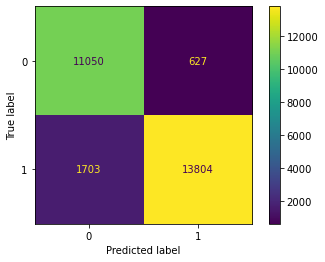

In [31]:
# Confusion matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, MNB_predict))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(MNB, X_test_vect, y_test)
plt.show()

## Save and Load Model

In [32]:
#save MNB model
filename = "MNB.pkl"  

with open(filename, 'wb') as file:  
    pickle.dump(MNB, file)

In [33]:
#load
filename = 'MNB.pkl'
with open(filename, 'rb') as file:  
    MNB_model = pickle.load(file)

In [34]:
#load
filename = 'Pickle_RL_Model.pkl'
with open(filename, 'rb') as file:  
    LR_Model = pickle.load(file)

C:\Users\THINKPAD E470\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Try to make a predictions

In [35]:
text = {'review':'sangat bagus sekali aplikasinya, membantu saya dalam mengurus bpjs'}
text = pd.DataFrame(text, index=[0])

In [36]:
text['review'] = [preprocessing(x) for x in text['review']]

In [37]:
text_vect = tfidf.transform(text['review'])

In [38]:
text_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [42]:
hasil = MNB.predict(text_vect)
if hasil == 1:
    hasil = 'POSITIF'
elif hasil == 0:
    hasil = 'NEGATIF'

print('Review tersebut adalah review', hasil)

Review tersebut adalah review POSITIF


## Deployment Model

In [43]:
# make function
def predict():
    Review = inp.get()
    try:
        Review = str(Review)
        
        df = {'Review':[Review]}
        test = pd.DataFrame(df, index=[0])
        test['Review'] = [preprocessing(abc) for abc in test['Review']]
        test_vect = tfidf.transform(test['Review'])
    
        lbl11['text'] = MNB.predict(test_vect)
        lbl11['text'] = lbl11['text'][1]
        if lbl11['text'] == '1':
            lbl11['text'] = 'Sentiment Positif'
        elif lbl11['text'] == '0':
            lbl11['text'] = 'Sentiment Negatif'
    except ValueError:
        messagebox.showinfo('Alert Message', 'Enter Properly!')

In [53]:
#tkiner code

window = tk.Tk()
window.title('Sentiment Predict!')
window.geometry('250x150+600+300')
window.configure(bg='white')

#Review
lab = Label(window, text='Input your review!', bg= 'white', fg = 'black', font='none 14')
lab.grid(row=1, column=1)

inp = tk.Entry(window)
inp.insert(1, 'review')
inp.grid(row=3, column=1)
lbl = tk.Label(window, text='Review: ')
lbl.grid(row=3, column=0)

but = tk.Button(window, text = 'Predict!', command=predict)
but.grid(row=6, column=0, sticky=W)
lbl11 = tk.Label(window, text='Result . . .', bg='black', fg='white', font='none 12')
lbl11.grid(row=7, column = 0, columnspan=3, sticky=W)

window.mainloop()